In [1]:
# Standard Libraries

# Anaconda
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

### Load Data and EDA

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00640/Occupancy_Estimation.csv")
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
# Combine date and time into a single timestamp
timestamp = pd.to_datetime(df["Date"].astype(str) + df["Time"], format="%Y/%m/%d%H:%M:%S")
df.insert(0, "Timestamp", timestamp)
df.drop(columns=["Date", "Time"], inplace=True)

In [4]:
df.count()

Timestamp               10129
S1_Temp                 10129
S2_Temp                 10129
S3_Temp                 10129
S4_Temp                 10129
S1_Light                10129
S2_Light                10129
S3_Light                10129
S4_Light                10129
S1_Sound                10129
S2_Sound                10129
S3_Sound                10129
S4_Sound                10129
S5_CO2                  10129
S5_CO2_Slope            10129
S6_PIR                  10129
S7_PIR                  10129
Room_Occupancy_Count    10129
dtype: int64

In [5]:
df.dtypes

Timestamp               datetime64[ns]
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
dtype: object

In [6]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


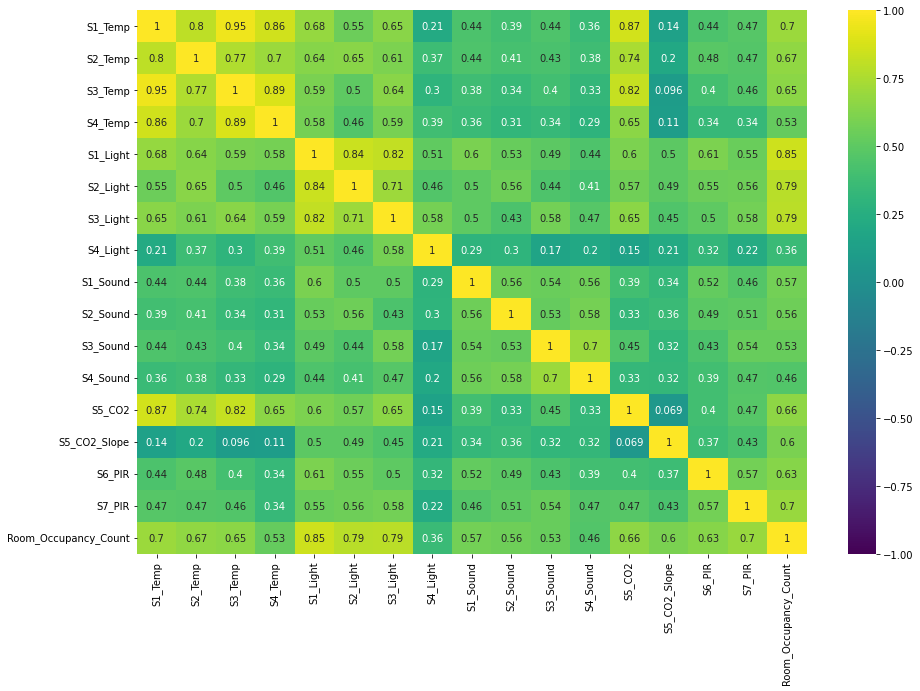

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, ax=ax)
plt.show()

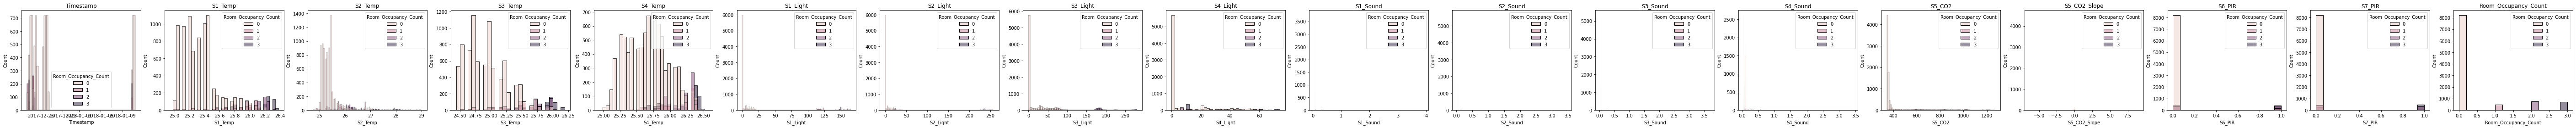

In [8]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(100, 4))

for ax, col in zip(axes, df.columns):
  sns.histplot(df, x=col, hue="Room_Occupancy_Count", ax=ax)
  ax.title.set_text(col)

plt.show()

### Feature Engineering

In [9]:
min_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.min()
max_occupied_time = df[df["Room_Occupancy_Count"].ge(1)]["Timestamp"].dt.time.max()

min_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.min()
max_unoccupied_time = df[df["Room_Occupancy_Count"] == 0]["Timestamp"].dt.time.max()

print(f"Min/Max Occupied Time: {min_occupied_time}/{max_occupied_time}")
print(f"Min/Max Unoccupied Time: {min_unoccupied_time}/{max_unoccupied_time}")

Min/Max Occupied Time: 10:49:41/19:51:46
Min/Max Unoccupied Time: 00:00:28/23:59:58


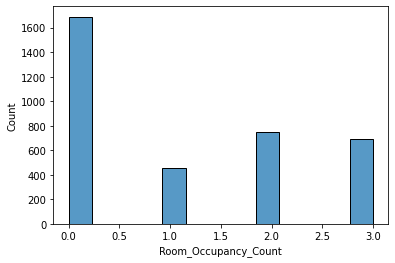

In [10]:
sns.histplot(df[df["Timestamp"].dt.time.between(min_occupied_time, max_occupied_time)]["Room_Occupancy_Count"])
plt.show()

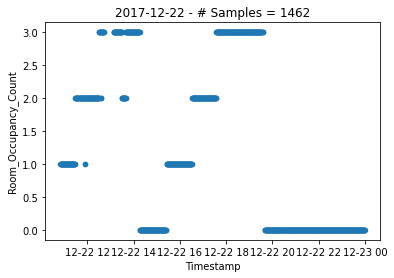

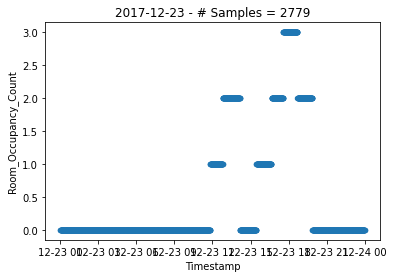

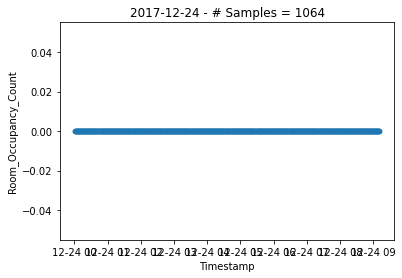

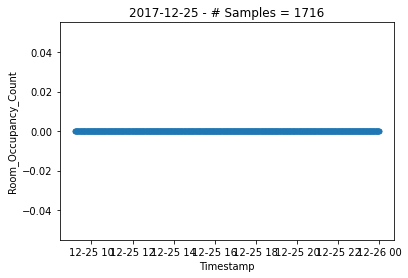

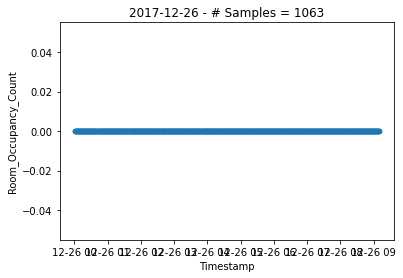

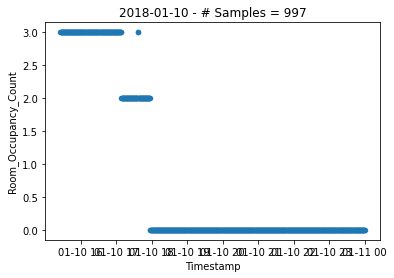

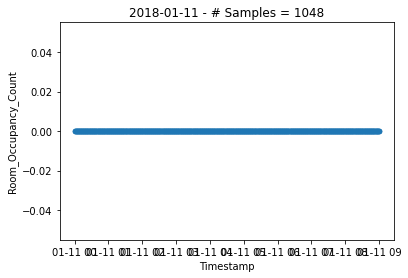

In [11]:
for date in df["Timestamp"].dt.date.unique():
  subset = df[df["Timestamp"].dt.date == date]
  subset.plot(x="Timestamp", y="Room_Occupancy_Count", kind="scatter")
  plt.title(f"{date} - # Samples = {len(subset)}")
  plt.show()

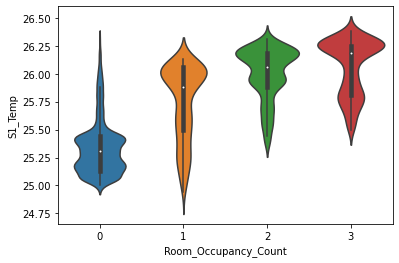

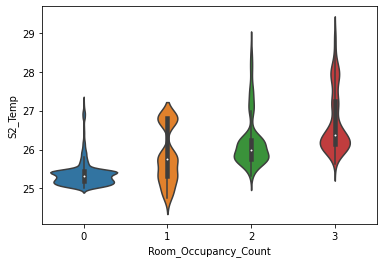

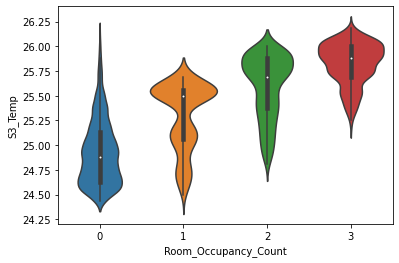

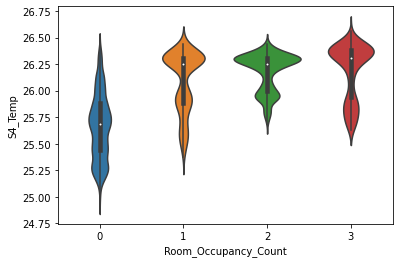

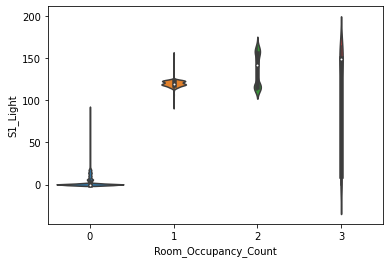

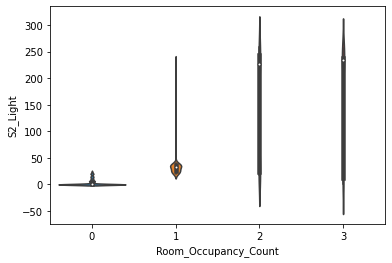

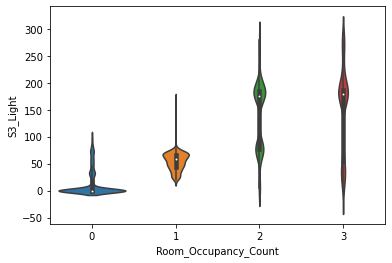

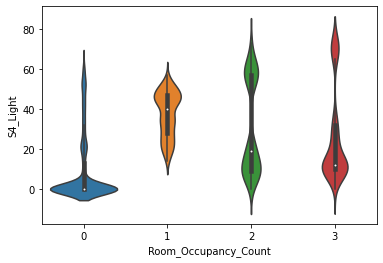

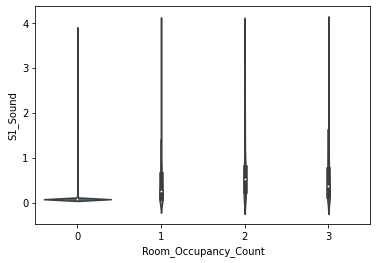

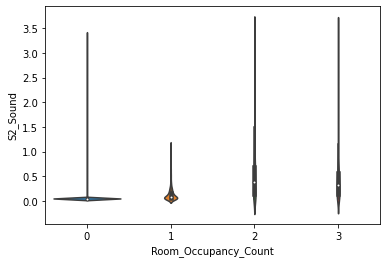

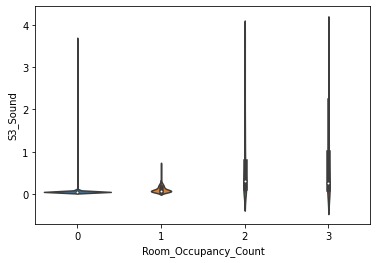

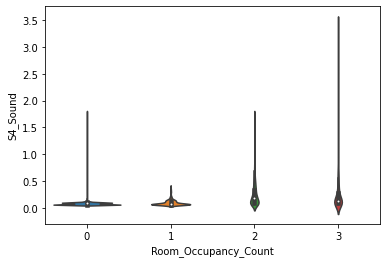

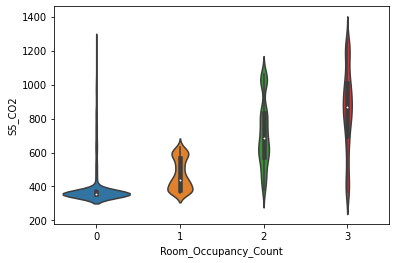

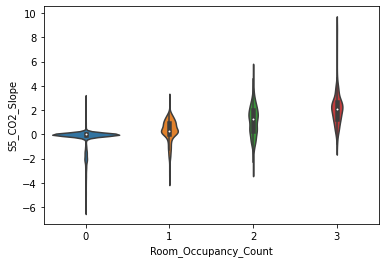

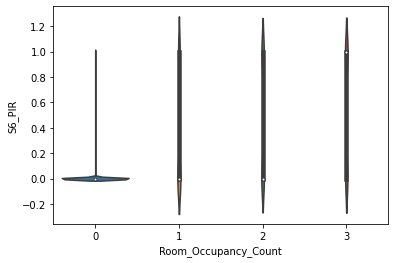

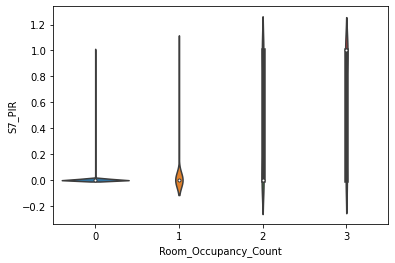

In [12]:
for column in df.columns:
  if column in ["Timestamp", "Room_Occupancy_Count"]:
    continue
  sns.violinplot(data=df, x="Room_Occupancy_Count", y=column, split=True)
  plt.show()

### Train/Validation/Train Split

In [13]:
def split_data(X, y, split=(0.6, 0.2, 0.2), seed=888):
  """
  Splits X/y into training, validation, and testing sets based on the
  specified split.

  Parameters
  ----------
  X : np.ndarray
    An array-like collection of sample points
  y : np.ndarray
    The class labels of the data, should match the length of data
  split : tuple
    The percentage allocation of training, validation, and test datasets

  Returns
  -------
  splits : tuple
    The training, validation, and test datasets with their labels
  """
  # Input checking
  if len(X) != len(y):
    raise ValueError(f"X and y lengths don't match ({len(X)} != {len(y)})")
  if len(split) != 3:
    raise ValueError("Invalid split, expected 3 percentages (training, validation, test)")
  if sum(split) != 1:
    raise ValueError(f"Invalid split {split}, percentages must sum to 1!")
  if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
    raise TypeError("X and y must be numpy arrays")

  # Initial split for testing data
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=split[2], random_state=seed, stratify=y)

  # Further split for validation data
  val_size = split[1] / (1 - split[2])
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train, test_size=val_size, random_state=seed, stratify=y_train)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [14]:
# Generate numpy arrays of data
X = df[list(df.columns)[1:-1]].values # Drop Timestamp column and exclude Room_Occupancy_Count
y = df["Room_Occupancy_Count"].values

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [15]:
print(f"Length of original dataset: {len(X)}")
print()
print(f"Length of X_train/y_train: {len(X_train)}/{len(y_train)}")
print(f"Length of X_val/y_train: {len(X_val)}/{len(y_val)}")
print(f"Length of X_test/y_train: {len(X_test)}/{len(y_test)}")
print()
print(f"Resulting split: ({len(X_train)/len(X):.2f}, {len(X_val)/len(X):.2f}, {len(X_test)/len(X):.2f})")

Length of original dataset: 10129

Length of X_train/y_train: 6077/6077
Length of X_val/y_train: 2026/2026
Length of X_test/y_train: 2026/2026

Resulting split: (0.60, 0.20, 0.20)


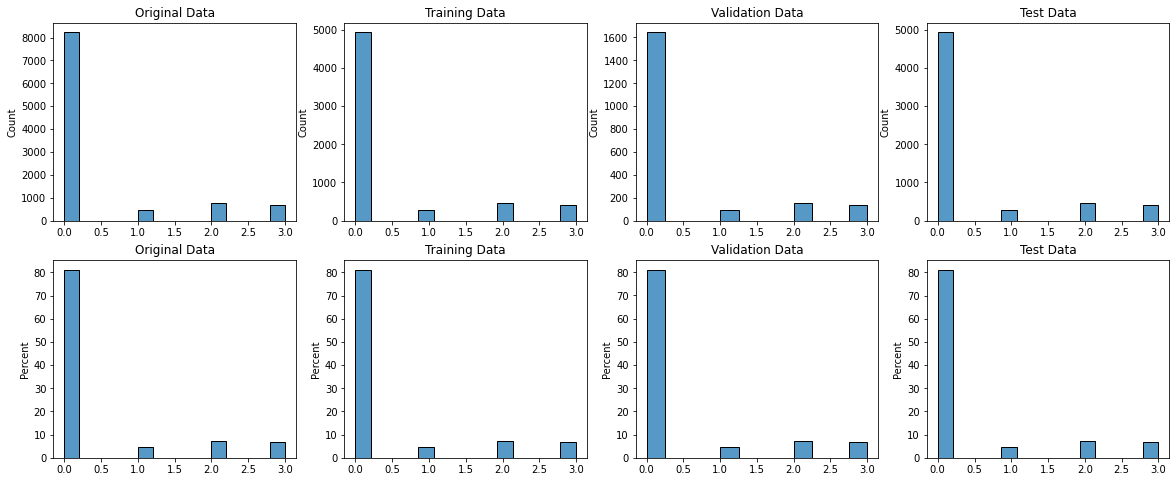

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

sns.histplot(df["Room_Occupancy_Count"], ax=axes[0, 0])
sns.histplot(y_train, ax=axes[0, 1])
sns.histplot(y_val, ax=axes[0, 2])
sns.histplot(y_train, ax=axes[0, 3])

sns.histplot(df["Room_Occupancy_Count"], stat="percent", ax=axes[1, 0])
sns.histplot(y_train, stat="percent", ax=axes[1, 1])
sns.histplot(y_val, stat="percent", ax=axes[1, 2])
sns.histplot(y_train, stat="percent", ax=axes[1, 3])

for ax, label in zip(axes[0], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)
for ax, label in zip(axes[1], ["Original Data", "Training Data", "Validation Data", "Test Data"]):
  ax.set_title(label)

for ax in axes.flatten():
  ax.set_xlabel("")

plt.show()